#### Importing necessary libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
import requests
warnings.simplefilter("ignore")
%matplotlib inline
print('Libraries Imported!')

Libraries Imported!


#### Reading the files. Changing the column to 'target'.

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
dfs = [df_train,df_test]
df_train.rename(columns = {'Won_Championship':'target'}, inplace = True)
df_test.rename(columns = {'Won_Championship':'target'}, inplace = True)
df_test.shape

(3500, 9)

In [3]:
df_train.head()

,target,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242


In [4]:
for df in dfs:
    df['Number_Of_Injured_Players'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10},inplace = True)
    df['Coach_Experience_Level'].replace({'Beginner':1,'Intermediate':2,'Advanced':3},inplace = True)

In [5]:
cats = ['Team_Value','Playing_Style']
cont = ['Previous_SB_Wins','Number_Of_Wins_This_Season','Number_Of_First_Round_Draft_Picks',
        'Average_Player_Age','Number_Of_Injured_Players','Coach_Experience_Level']
df_train = pd.concat([df_train,pd.get_dummies(df_train['Team_Value'])],axis = 1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['Playing_Style'])],axis = 1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Team_Value'])],axis = 1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Playing_Style'])],axis = 1)
df_train.drop(cats,axis = 1,inplace = True)
df_test.drop(cats,axis = 1,inplace = True)

In [6]:
df_train['Number_Of_Injured_Players'] = df_train['Number_Of_Injured_Players'].astype('int64')
df_test['Number_Of_Injured_Players'] = df_test['Number_Of_Injured_Players'].astype('int64')

In [7]:
df_train.dtypes

target                               int64
Previous_SB_Wins                     int64
Number_Of_Wins_This_Season           int64
Number_Of_First_Round_Draft_Picks    int64
Average_Player_Age                   int64
Number_Of_Injured_Players            int64
Coach_Experience_Level               int64
ID                                   int64
Above_Four_Billion                   uint8
Less_Than_Four_Billion               uint8
Less_Than_Three_Billion              uint8
Aggressive_Defense                   uint8
Aggressive_Offense                   uint8
Balanced                             uint8
Relaxed                              uint8
dtype: object

In [8]:
# df_train[df_train.columns[8:]] = df_train[df_train.columns[8:]].astype('int64')
# df_test[df_train.columns[8:]] = df_test[df_train.columns[8:]].astype('int64')

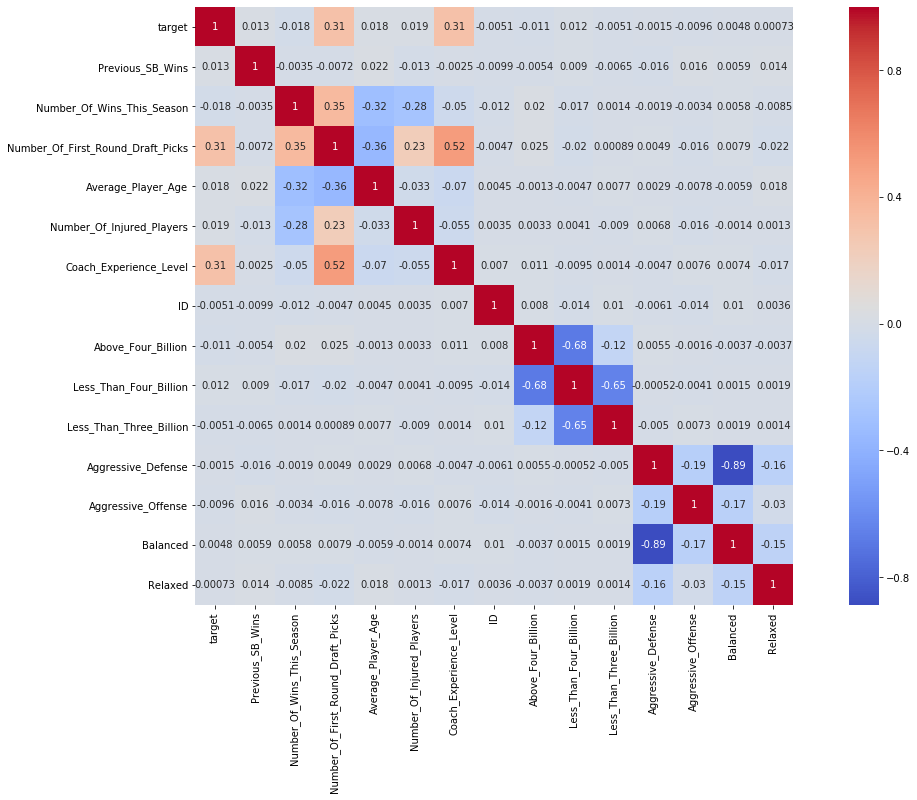

In [9]:
corr = df_train.corr()
plt.figure(figsize = (20,11))
sns.heatmap(corr,annot = True,square = True, cmap = 'coolwarm')
plt.show()

In [10]:
df_train.head()

,target,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID,Above_Four_Billion,Less_Than_Four_Billion,Less_Than_Three_Billion,Aggressive_Defense,Aggressive_Offense,Balanced,Relaxed
0,0,3,13,2,27,5,2,6056,0,1,0,0,0,1,0
1,0,2,14,2,26,5,2,9702,0,1,0,0,1,0,0
2,1,2,13,1,27,4,2,1745,0,1,0,1,0,0,0
3,0,2,12,2,27,6,2,4757,1,0,0,0,0,1,0
4,0,1,15,2,26,5,2,7242,0,1,0,0,0,1,0


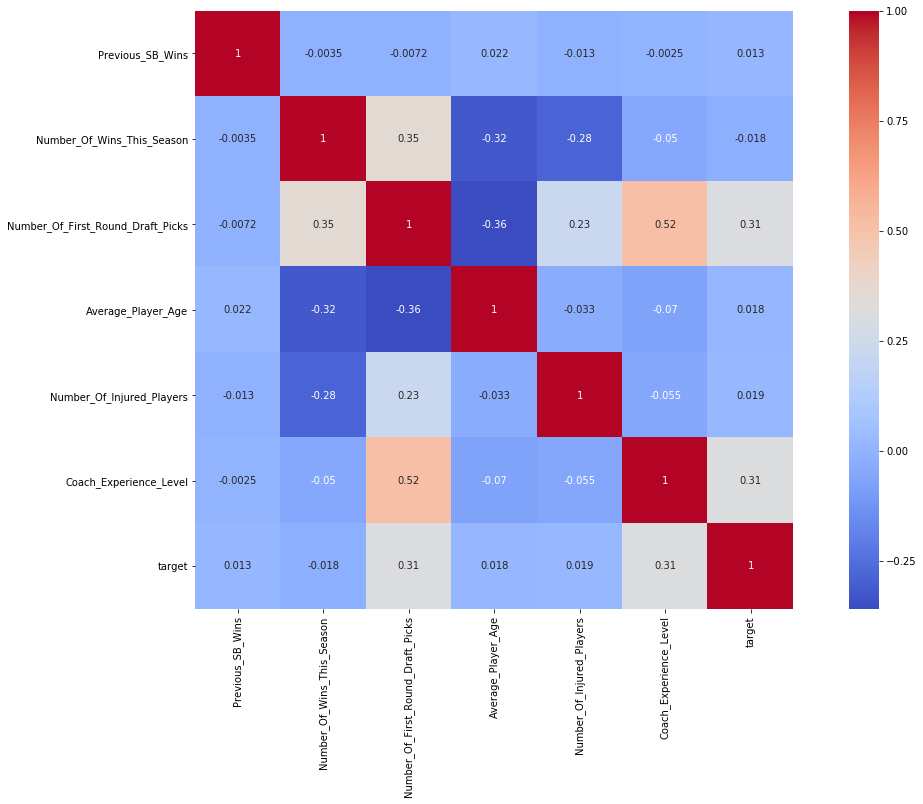

In [11]:
corr = df_train[cont+['target']].corr()
plt.figure(figsize = (20,11))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, square = True)
plt.show()

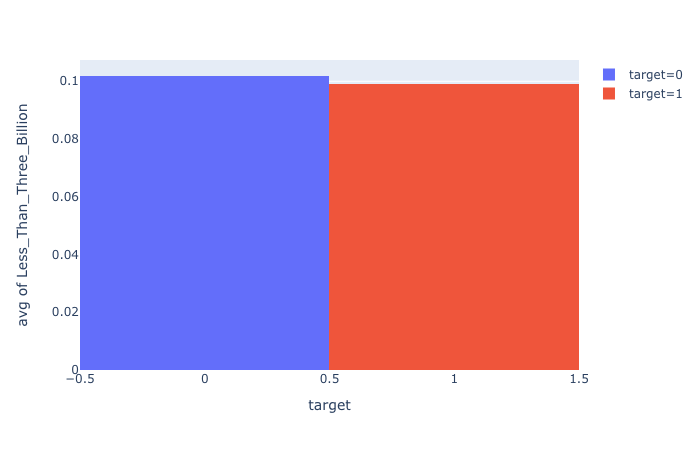

In [12]:
fig = px.histogram(df_train, x = 'target',y = 'Less_Than_Three_Billion',histfunc = 'avg',color = 'target')
fig.show('png')

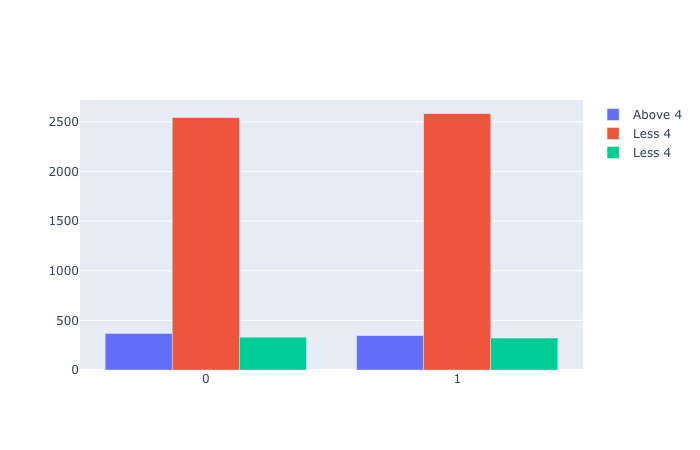

In [13]:
cost = df_train[['Above_Four_Billion','Less_Than_Four_Billion','Less_Than_Three_Billion','target']]
cost_grouped = cost.groupby('target').sum()
fig = go.Figure()
fig.add_trace(go.Bar(name = 'Above 4', x = cost_grouped.index, y = cost_grouped['Above_Four_Billion']))
fig.add_trace(go.Bar(name = 'Less 4', x = cost_grouped.index, y = cost_grouped['Less_Than_Four_Billion']))
fig.add_trace(go.Bar(name = 'Less 4', x = cost_grouped.index, y = cost_grouped['Less_Than_Three_Billion']))
fig.show('png')

In [14]:
df_train['target'].value_counts()

1    3255
0    3245
Name: target, dtype: int64

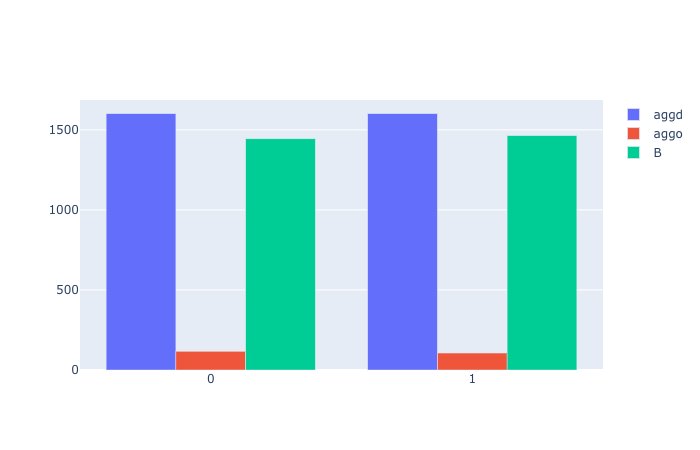

In [15]:
play = df_train[['Aggressive_Defense','Aggressive_Offense','Balanced','target']]
play_grouped = play.groupby('target').sum()
fig = go.Figure()
fig.add_trace(go.Bar(name = 'aggd', x = play_grouped.index, y = play_grouped['Aggressive_Defense']))
fig.add_trace(go.Bar(name = 'aggo', x = play_grouped.index, y = play_grouped['Aggressive_Offense']))
fig.add_trace(go.Bar(name = 'B', x = play_grouped.index, y = play_grouped['Balanced']))
fig.show('png')

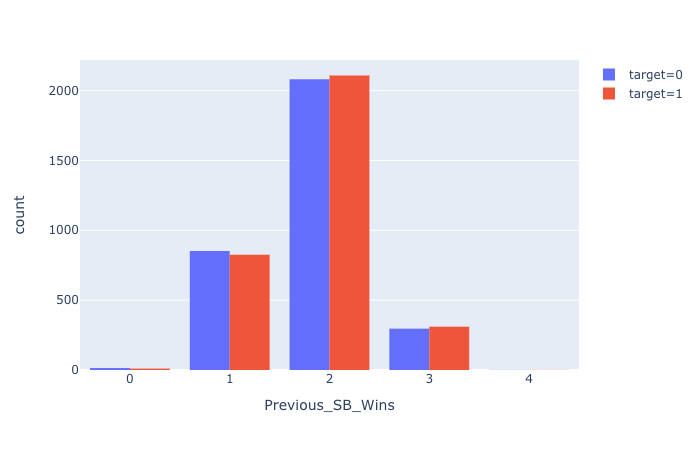

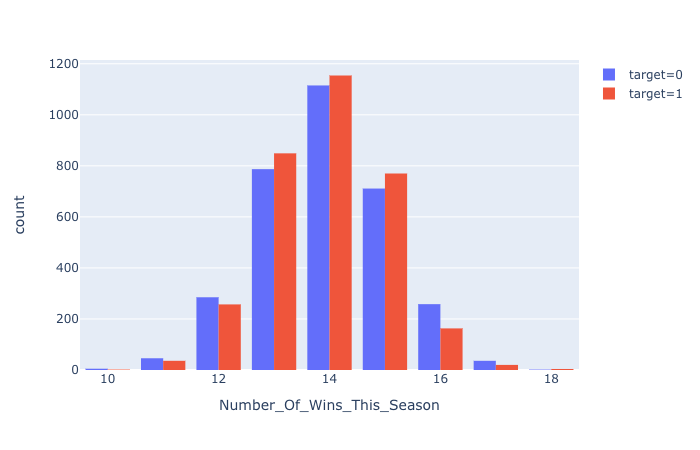

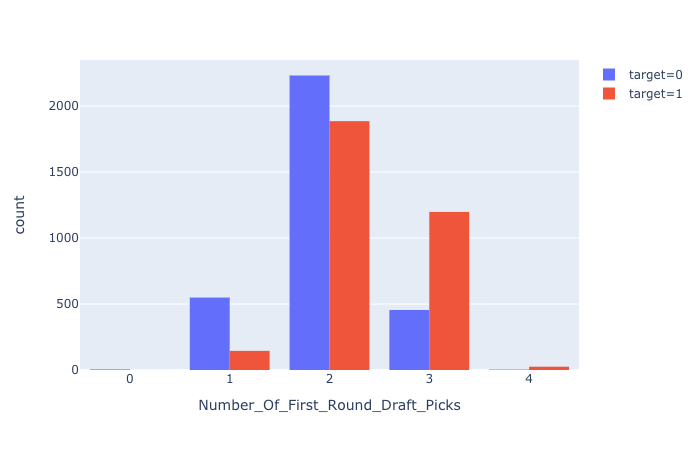

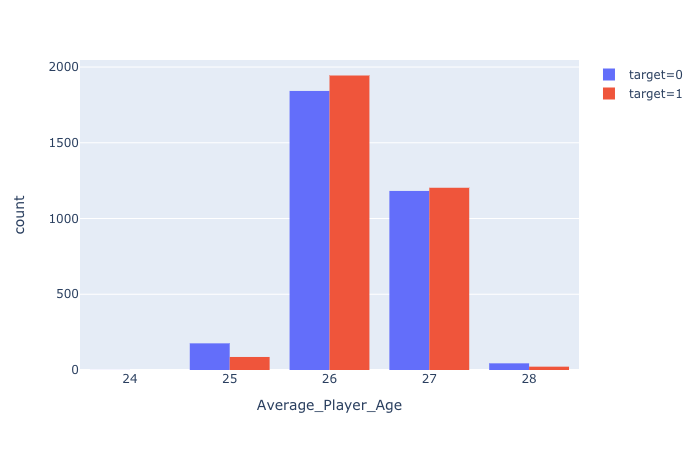

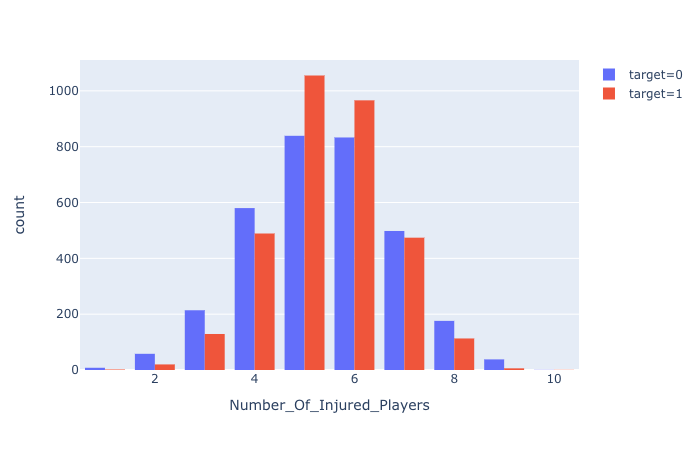

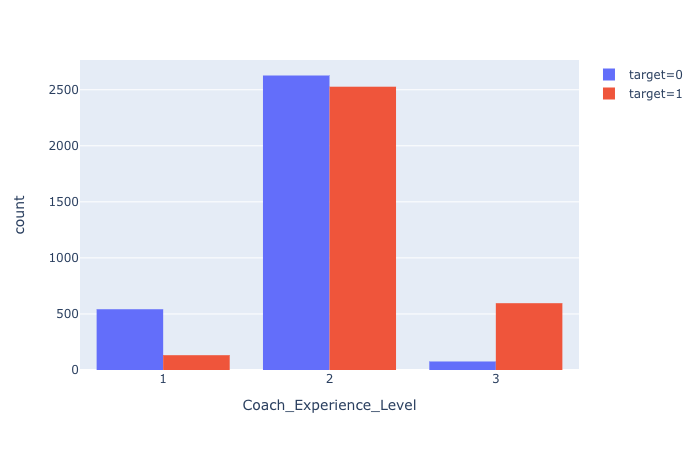

In [16]:
for column in cont:
    fig = px.histogram(df_train, x = column,color = 'target',barmode = 'group')
    fig.show('png')

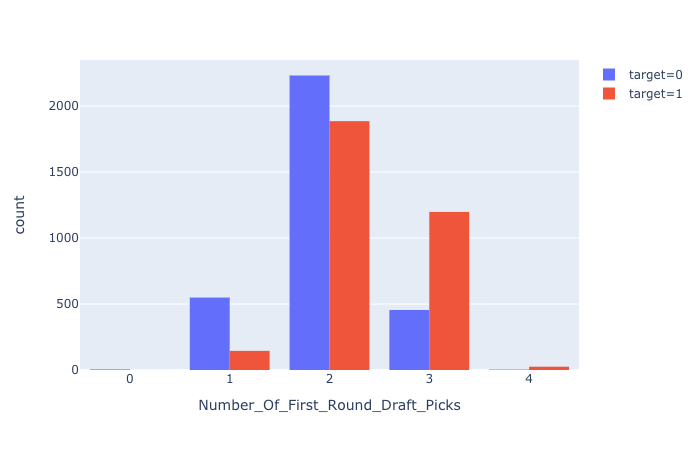

In [17]:
fig = px.histogram(df_train, x = 'Number_Of_First_Round_Draft_Picks', color = 'target', barmode = 'group')
fig.show('png')

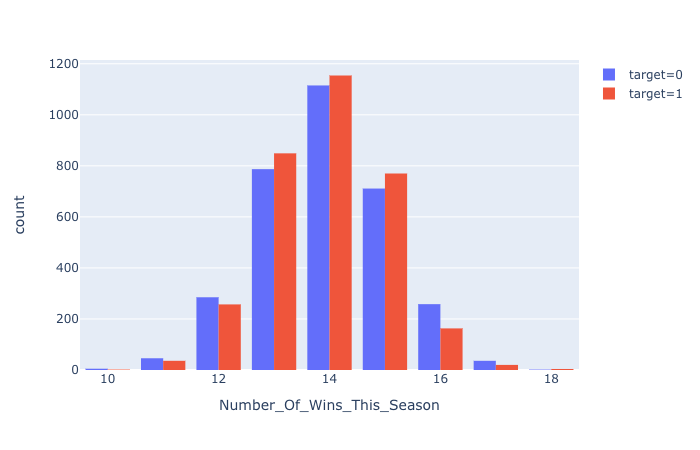

In [18]:
fig = px.histogram(df_train, x = 'Number_Of_Wins_This_Season', color = 'target', barmode = 'group')
fig.show('png')

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,f1_score
import time
ids = df_train['ID']
df_train.drop(['ID'],axis = 1,inplace = True)
ids_test = df_test['ID']
df_test.drop(['ID'],axis=1,inplace = True)
X = df_train[df_train.columns[1:]].values
y = df_train['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train size: {}'.format(X_train.shape[0]))
print('Test size: {}'.format(X_test.shape[0]))
df_test.shape

Train size: 5200
Test size: 1300


(3500, 13)

In [20]:
X_train,y_train

(array([[ 1, 14,  2, ...,  0,  1,  0],
        [ 2, 13,  1, ...,  0,  1,  0],
        [ 1, 12,  2, ...,  0,  1,  0],
        ...,
        [ 2, 13,  1, ...,  0,  1,  0],
        [ 1, 14,  1, ...,  0,  1,  0],
        [ 2, 13,  1, ...,  0,  0,  0]]), array([1, 1, 1, ..., 1, 0, 1]))

In [21]:
X_test,y_test

(array([[ 2, 14,  1, ...,  0,  0,  0],
        [ 3, 12,  2, ...,  0,  1,  0],
        [ 2, 12,  2, ...,  0,  1,  0],
        ...,
        [ 2, 17,  2, ...,  0,  1,  0],
        [ 2, 13,  2, ...,  0,  1,  0],
        [ 2, 15,  2, ...,  0,  0,  0]]), array([0, 1, 0, ..., 0, 0, 0]))

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
X_train,y_train

(array([[-1.42358649,  0.07060771, -0.26210256, ..., -0.19152706,
          1.11851788, -0.16012815],
        [ 0.29316902, -0.80987209, -1.932364  , ..., -0.19152706,
          1.11851788, -0.16012815],
        [-1.42358649, -1.69035189, -0.26210256, ..., -0.19152706,
          1.11851788, -0.16012815],
        ...,
        [ 0.29316902, -0.80987209, -1.932364  , ..., -0.19152706,
          1.11851788, -0.16012815],
        [-1.42358649,  0.07060771, -1.932364  , ..., -0.19152706,
          1.11851788, -0.16012815],
        [ 0.29316902, -0.80987209, -1.932364  , ..., -0.19152706,
         -0.89404024, -0.16012815]]), array([1, 1, 1, ..., 1, 0, 1]))

In [24]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

accuracy_train1 = []
accuracy_test1 = []
cv_score1 = []
f1_score1 = []
f1_score2 = []
precision1 = []
recall1 = []
classifiers = [LogisticRegression(),SGDClassifier(),GaussianNB(),SVC(),NuSVC(),
               LinearSVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for classifier in classifiers:
    start = time.time()
    clf = classifier
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    cvscore = cross_val_score(clf, X, y, cv=5)

    end = time.time()

    accuracy_train1.append(accuracy_score(y_train_pred, y_train))
    accuracy_test1.append(accuracy_score(y_test_pred, y_test))
    cv_score1.append(np.mean(cvscore))
    f1_score1.append(metrics.f1_score(y_train,y_train_pred,average='binary'))
    f1_score2.append(metrics.f1_score(y_test,y_test_pred,average='binary'))
    precision1.append(metrics.precision_score(y_test_pred,y_test))
    recall1.append(metrics.recall_score(y_test_pred,y_test))

    print(str(classifier).split('(')[0])
    print('Precision: {}, Recall : {}'
          .format(metrics.precision_score(y_test_pred,y_test),metrics.recall_score(y_test_pred,y_test)))
    print('F1 Score train: {}'.format(metrics.f1_score(y_train_pred,y_train)))
    print('F1 Score test: {}'.format(metrics.f1_score(y_test_pred,y_test)))
    print('Accuracy on training set: {:.2%}'
          .format(accuracy_score(y_train_pred, y_train)))
    print('Accuracy on test set: {:.2%}'
          .format(accuracy_score(y_test_pred, y_test)))
    print('Crossval score: {:.2%} (+/- {:.2%})'
          .format(np.mean(cvscore),np.std(cvscore)*2))
    print('Time taken : {:.5} seconds'
          .format(end - start))
    print('\n')

LogisticRegression
Precision: 0.6454689984101749, Recall : 0.6207951070336392
F1 Score train: 0.6427887377896955
F1 Score test: 0.632891660171473
Accuracy on training set: 64.13%
Accuracy on test set: 63.77%
Crossval score: 65.37% (+/- 1.09%)
Time taken : 0.22039 seconds


SGDClassifier
Precision: 0.5691573926868044, Recall : 0.6057529610829103
F1 Score train: 0.6128838049367852
F1 Score test: 0.5868852459016394
Accuracy on training set: 62.90%
Accuracy on test set: 61.23%
Crossval score: 55.94% (+/- 9.57%)
Time taken : 0.27692 seconds


GaussianNB
Precision: 0.6772655007949125, Recall : 0.5949720670391061
F1 Score train: 0.6511115193826933
F1 Score test: 0.633457249070632
Accuracy on training set: 63.48%
Accuracy on test set: 62.08%
Crossval score: 63.57% (+/- 4.36%)
Time taken : 0.016981 seconds


SVC
Precision: 0.7027027027027027, Recall : 0.7428571428571429
F1 Score train: 0.7693194925028835
F1 Score test: 0.7222222222222223
Accuracy on training set: 76.92%
Accuracy on test set: 73

The best classifiers ranking based on f1 score (evaluation metric) would be in the order:
- KNeighbors
- Random Forest
- SVC
- NuSVC

#### Predicting the new data in the problem

Using a voting classifier with the best classifiers above.

In [46]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('dt',classifiers[-3]),('nuSVC',classifiers[4]),('rf', classifiers[-1]), ('svc', classifiers[3]),('knn',classifiers[7])], voting='hard')
eclf1.fit(X_train,y_train)
# y_train_pred = eclf1.predict(X_train)
# y_test_pred = eclf1.predict(X_test)
# f1_score(y_test,y_test_pred)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
   

In [47]:
test = df_test.values
test = scaler.fit_transform(test)

In [48]:
test.shape

(3500, 13)

In [49]:
eclf1.predict(test)

array([1, 1, 0, ..., 0, 0, 0])

#### Saving data frame to csv file.

In [50]:
pd.DataFrame(zip(ids_test,eclf1.predict(test)),columns = ['ID','Won_Championship']).to_csv('try1.csv',index = False)